In [4]:
#decision tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
df = pd.read_csv("penguins_size.csv")

In [9]:
df = df.dropna()

In [37]:
df.head()

,species,island,culmen_len,culmen_depth,flipper_len,mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [18]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [35]:
df=df.rename(columns={'flipper_length_mm':'flipper_len','body_mass_g':'mass','culmen_depth_mm':'culmen_depth','culmen_length_mm':'culmen_len'})

In [39]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=False)
y = df['species']

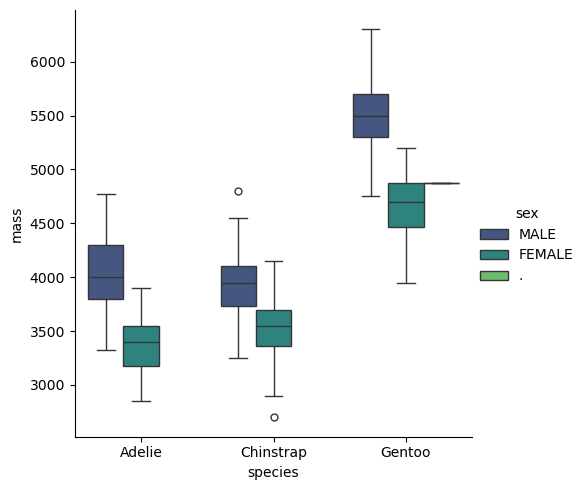

In [41]:
sns.catplot(x='species',y='mass',data=df,kind='box',hue='sex',palette='viridis')

In [113]:
df = df[df['sex']!='.']

In [115]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [52]:
#10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [140]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=39)

In [142]:
preds = model.predict(X_test)

In [144]:
cm = confusion_matrix(y_test, preds,normalize='true')

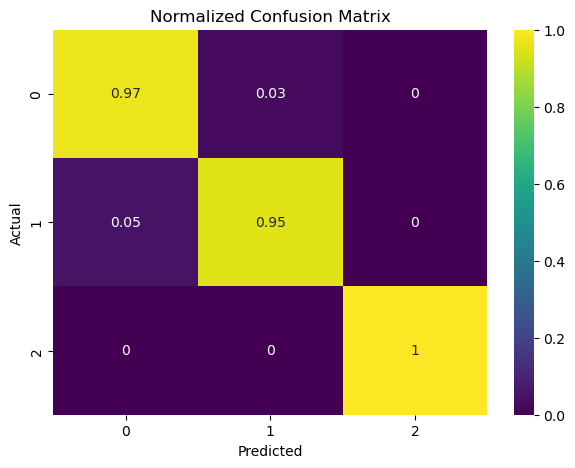

In [146]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [66]:
print(classification_report(y_test,preds)) #

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [148]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_len,0.342356
culmen_depth,0.119124
flipper_len,0.227420
mass,0.116286
island_Biscoe,0.085164
island_Dream,0.081508
island_Torgersen,0.017461
sex_FEMALE,0.003059
sex_MALE,0.007622


In [150]:
X.columns

Index(['culmen_len', 'culmen_depth', 'flipper_len', 'mass', 'island_Biscoe',
       'island_Dream', 'island_Torgersen', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [152]:
#X=X.drop(columns=['sex_.'])

In [154]:
df.head()

,species,island,culmen_len,culmen_depth,flipper_len,mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [158]:
print("Number of NaN values in X_train:\n", X_train.isna().sum())
print("Number of NaN values in X_test:\n", X_test.isna().sum())
print("Number of infinite values in X_train:\n", np.isinf(X_train).sum())
print("Number of infinite values in X_test:\n", np.isinf(X_test).sum())

Number of NaN values in X_train:
 culmen_len          0
culmen_depth        0
flipper_len         0
mass                0
island_Biscoe       0
island_Dream        0
island_Torgersen    0
sex_FEMALE          0
sex_MALE            0
dtype: int64
Number of NaN values in X_test:
 culmen_len          0
culmen_depth        0
flipper_len         0
mass                0
island_Biscoe       0
island_Dream        0
island_Torgersen    0
sex_FEMALE          0
sex_MALE            0
dtype: int64
Number of infinite values in X_train:
 culmen_len          0
culmen_depth        0
flipper_len         0
mass                0
island_Biscoe       0
island_Dream        0
island_Torgersen    0
sex_FEMALE          0
sex_MALE            0
dtype: int64
Number of infinite values in X_test:
 culmen_len          0
culmen_depth        0
flipper_len         0
mass                0
island_Biscoe       0
island_Dream        0
island_Torgersen    0
sex_FEMALE          0
sex_MALE            0
dtype: int64


In [160]:
n_estimators=[64,100,128,200]
max_features= [2,3,4,5,6]
bootstrap = [True,False]
oob_score = [True,False] #rows not used during bootstrapping, free info

In [162]:
param_grid = [
    {'n_estimators': [64, 100, 128, 200],
     'max_features': [2, 3, 4, 5, 6],
     'bootstrap': [True],
     'oob_score': [True, False]},
    {'n_estimators': [64, 100, 128, 200],
     'max_features': [2, 3, 4, 5, 6],
     'bootstrap': [False],
     'oob_score': [False]}  #rows not used during bootstrapping, free info 
]

In [164]:
rfc = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=39),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [64, 100, 128, 200],
                          'oob_score': [True, False]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [64, 100, 128, 200],
                          'oob_score': [False]}],
             scoring='accuracy')

In [166]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [169]:
errors = []
misclassifications = []

for n in range(1,100):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

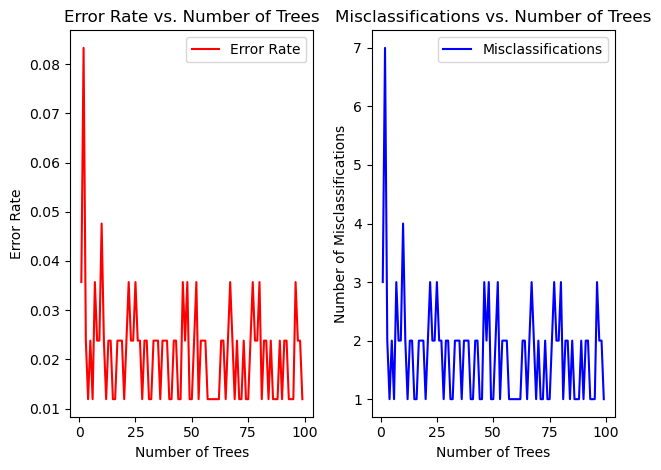

In [196]:
plt.subplot(1, 2, 1)
plt.plot(range(1, 100), errors, label='Error Rate', color='red')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Trees')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 100), misclassifications, label='Misclassifications', color='blue')
plt.xlabel('Number of Trees')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassifications vs. Number of Trees')
plt.legend()

plt.tight_layout()
plt.show()

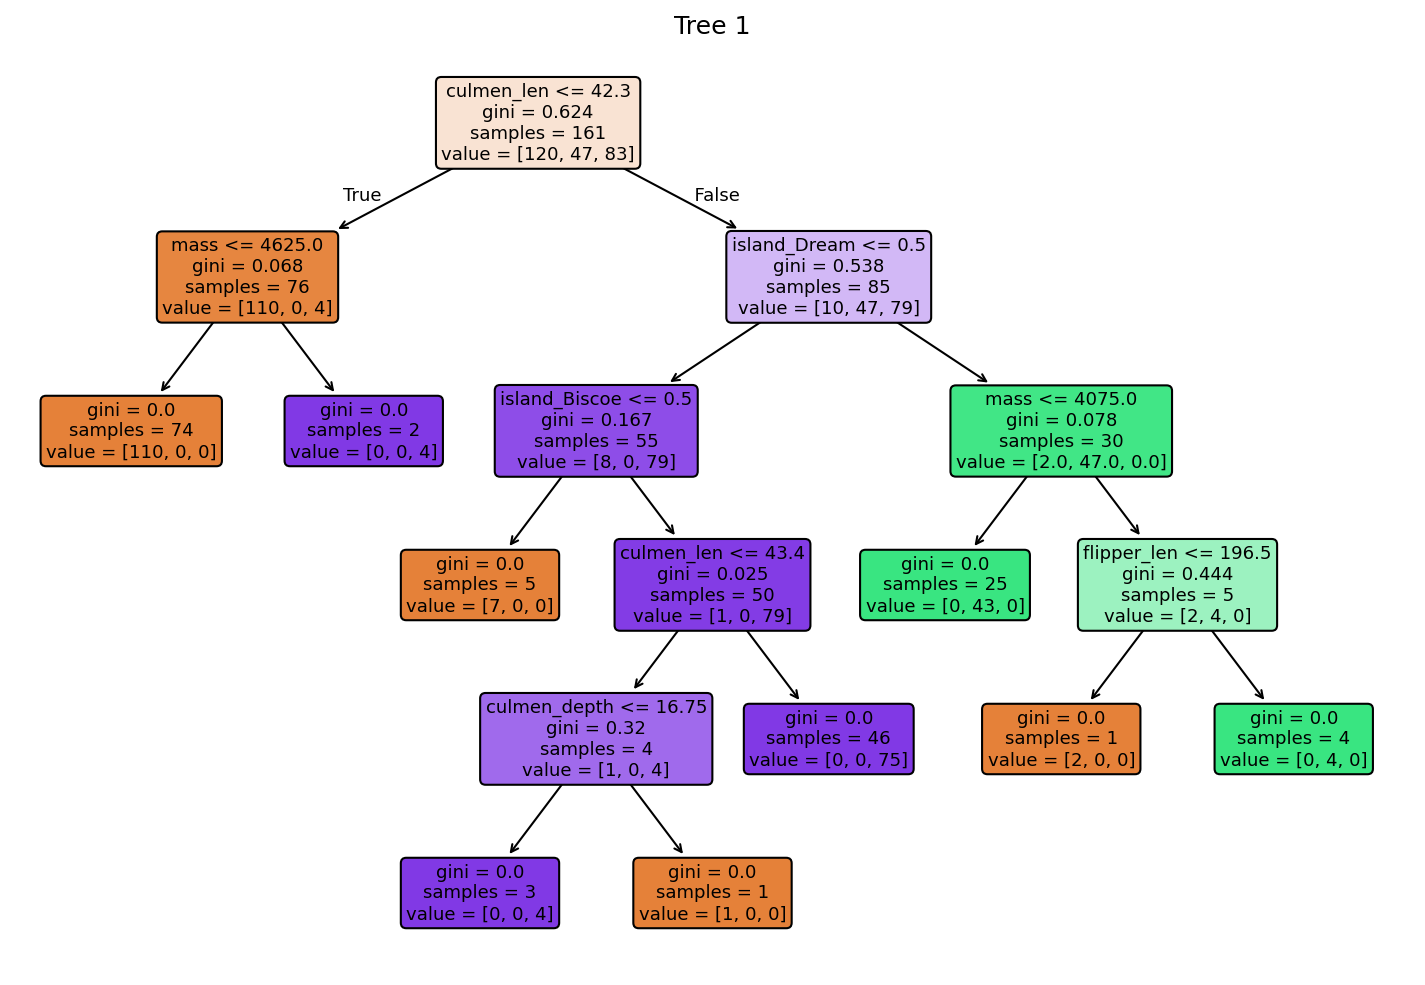

In [194]:
# Visualize first tree in the forest
plt.figure(figsize=(12, 8), dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, rounded=True)
plt.title("Tree 1")
plt.show()